In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sktime.forecasting.model_selection import (temporal_train_test_split, ExpandingWindowSplitter)
import datetime as dt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_absolute_percentage_error

11:29:33 - cmdstanpy - INFO - Chain [1] start processing
11:29:33 - cmdstanpy - INFO - Chain [1] done processing
11:29:35 - cmdstanpy - INFO - Chain [1] start processing
11:29:35 - cmdstanpy - INFO - Chain [1] done processing
11:29:36 - cmdstanpy - INFO - Chain [1] start processing
11:29:36 - cmdstanpy - INFO - Chain [1] done processing
11:29:38 - cmdstanpy - INFO - Chain [1] start processing
11:29:38 - cmdstanpy - INFO - Chain [1] done processing
11:29:39 - cmdstanpy - INFO - Chain [1] start processing
11:29:39 - cmdstanpy - INFO - Chain [1] done processing
11:29:41 - cmdstanpy - INFO - Chain [1] start processing
11:29:41 - cmdstanpy - INFO - Chain [1] done processing
11:29:42 - cmdstanpy - INFO - Chain [1] start processing
11:29:42 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\egrah\AppData\Local\Temp\ipykernel_20940\713205872.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained 

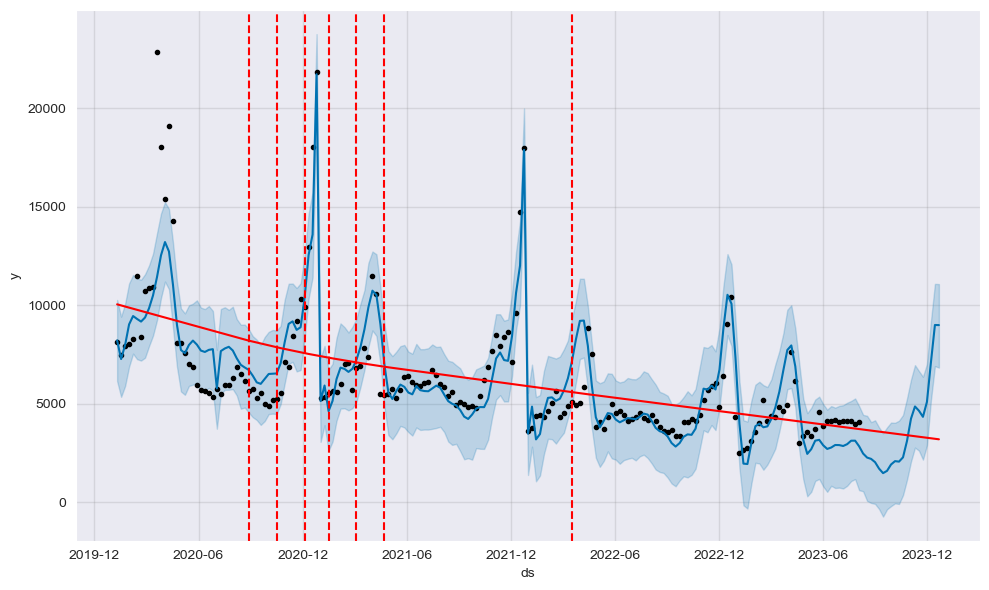

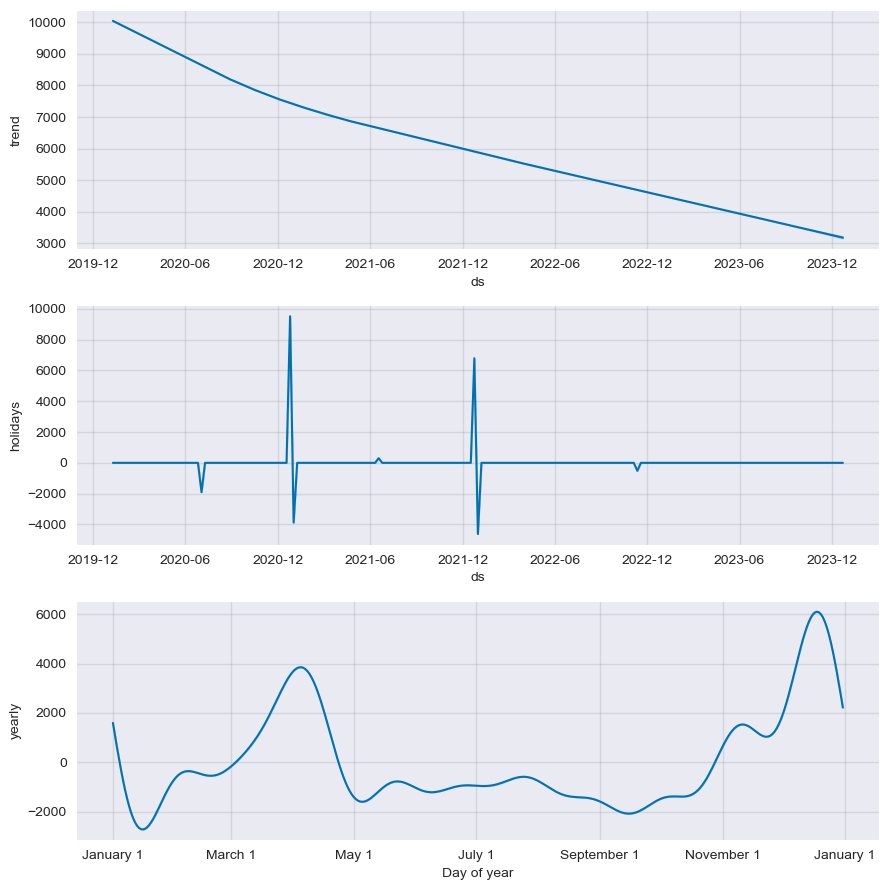

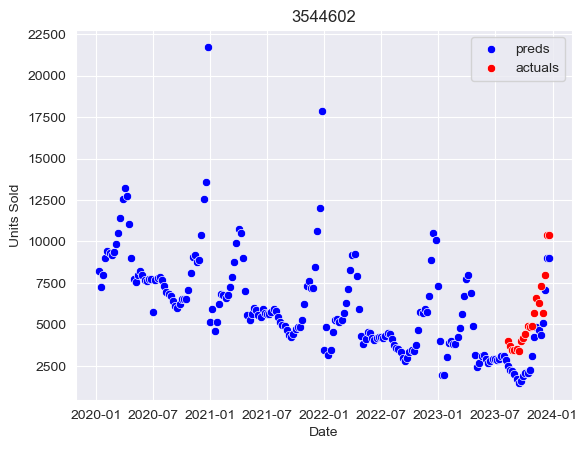

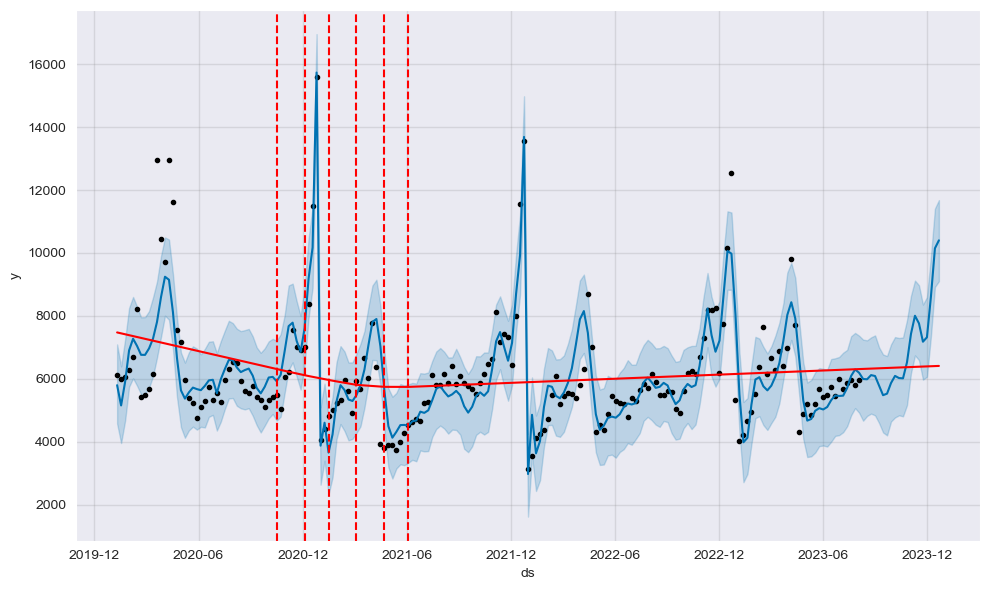

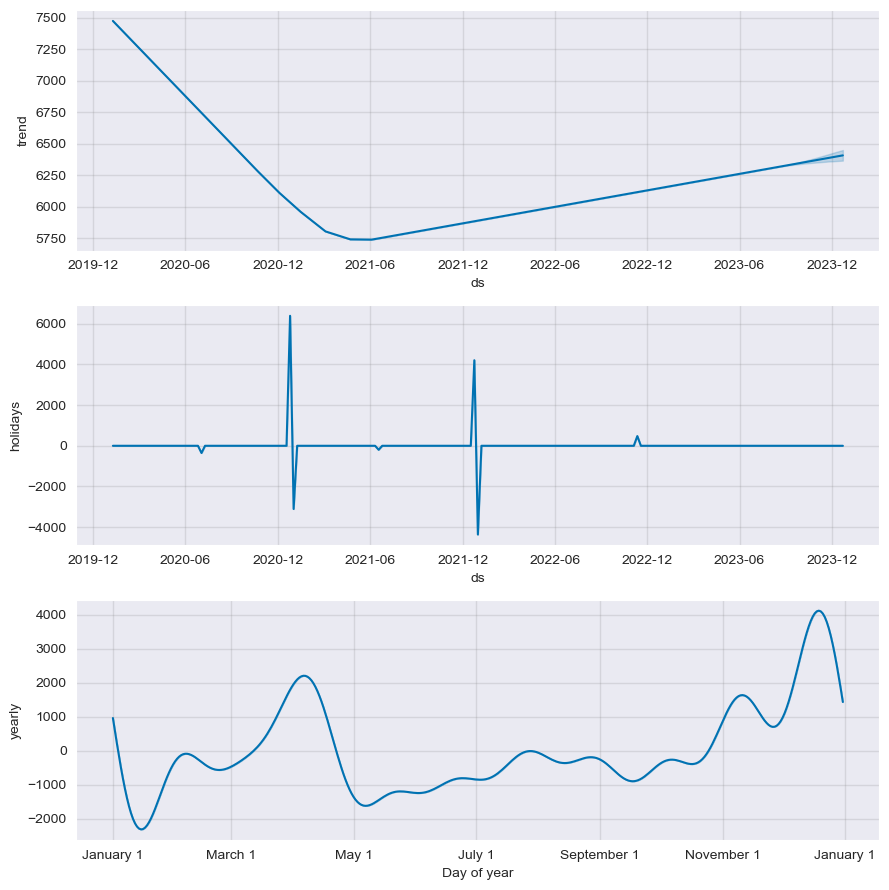

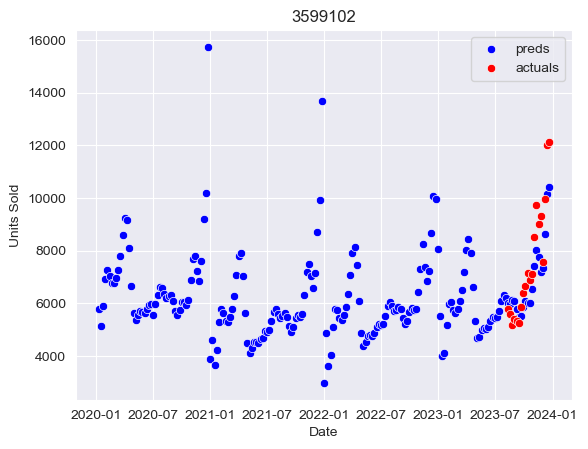

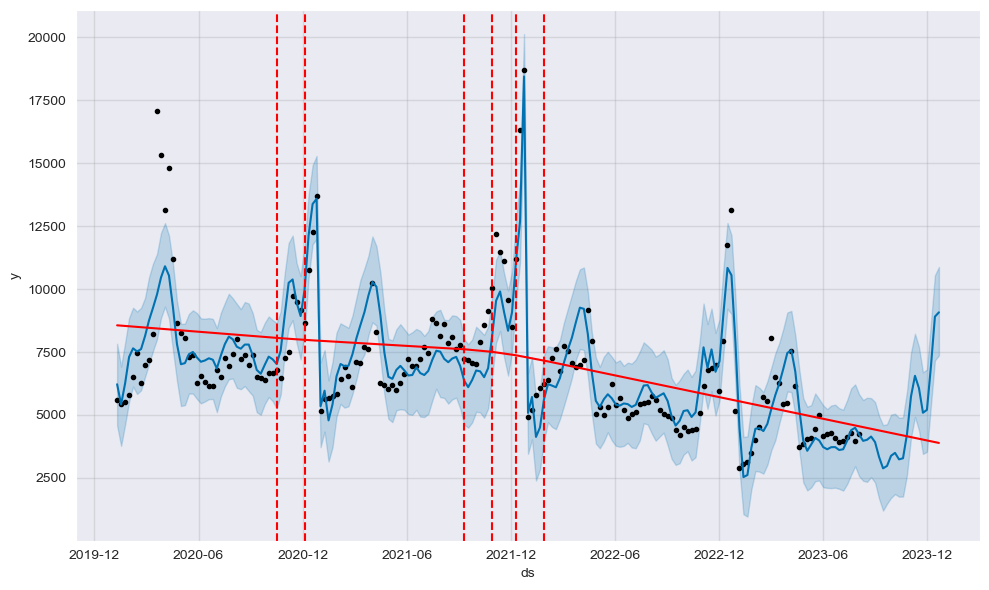

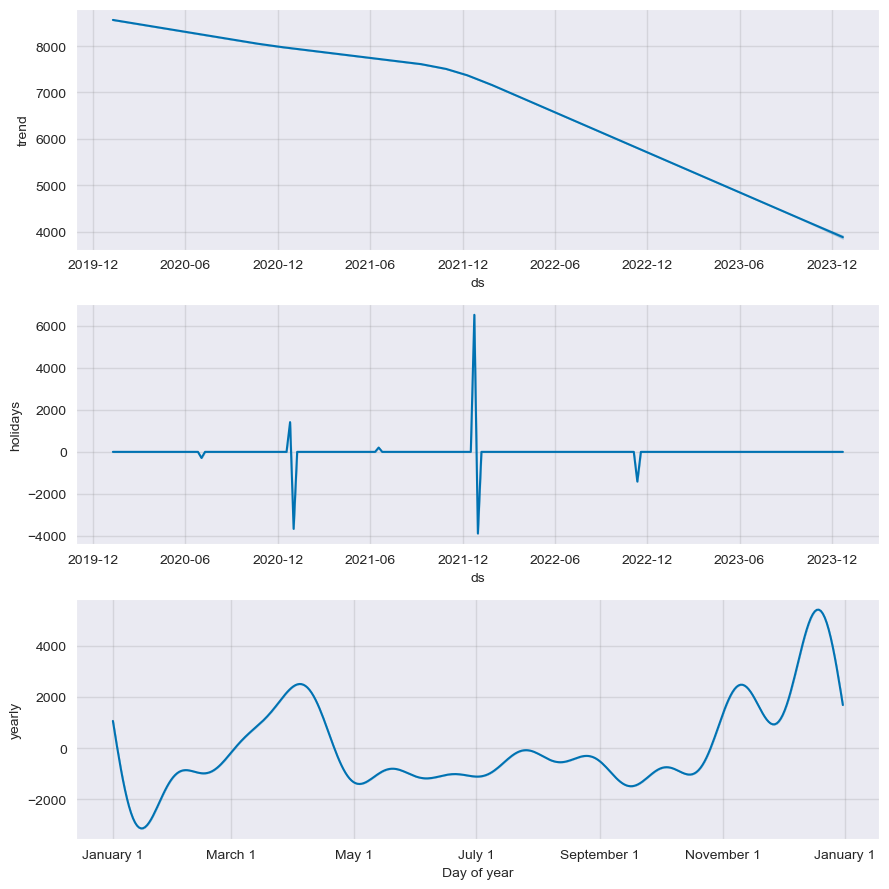

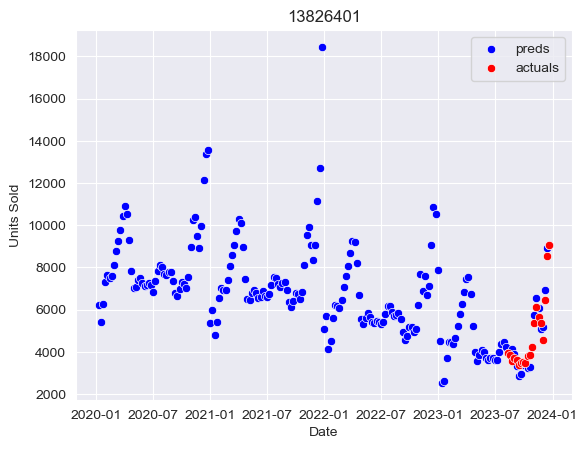

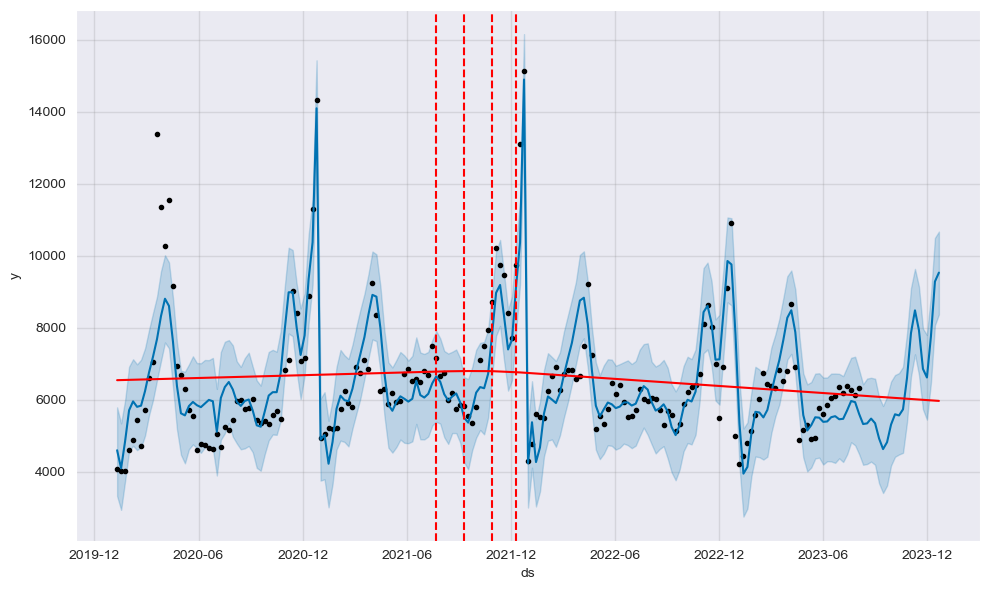

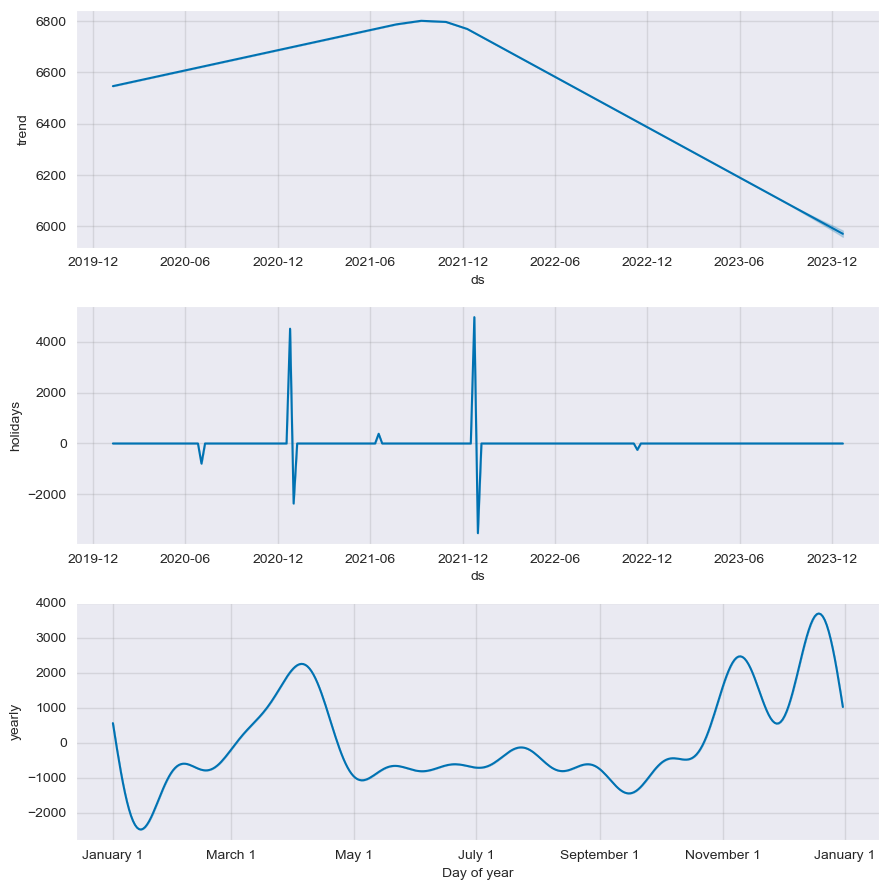

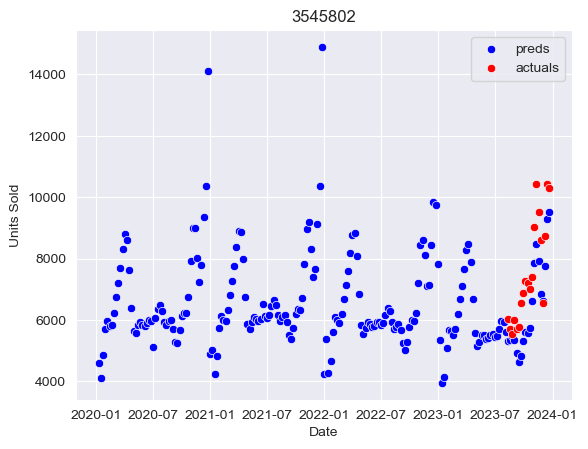

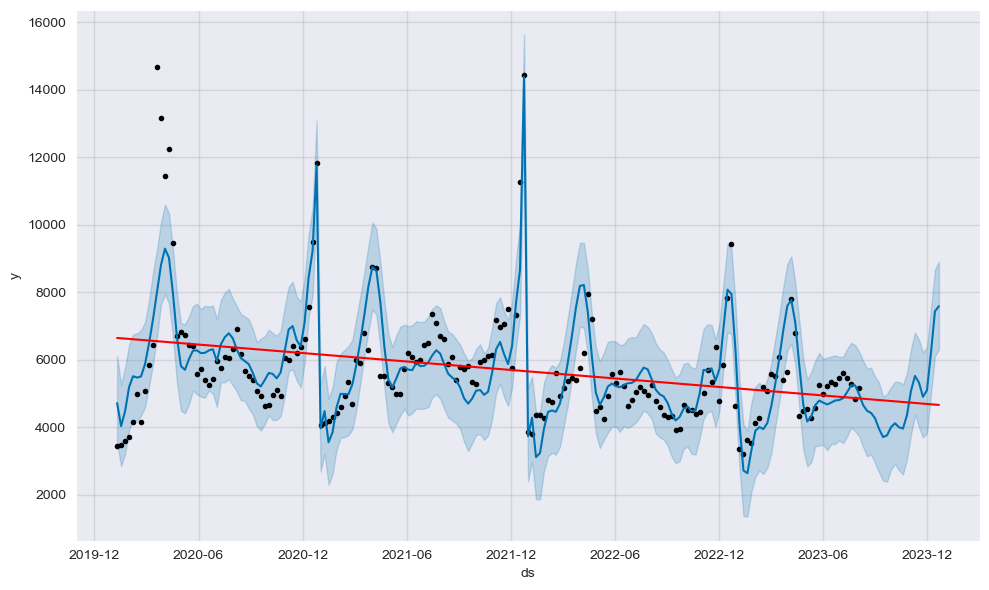

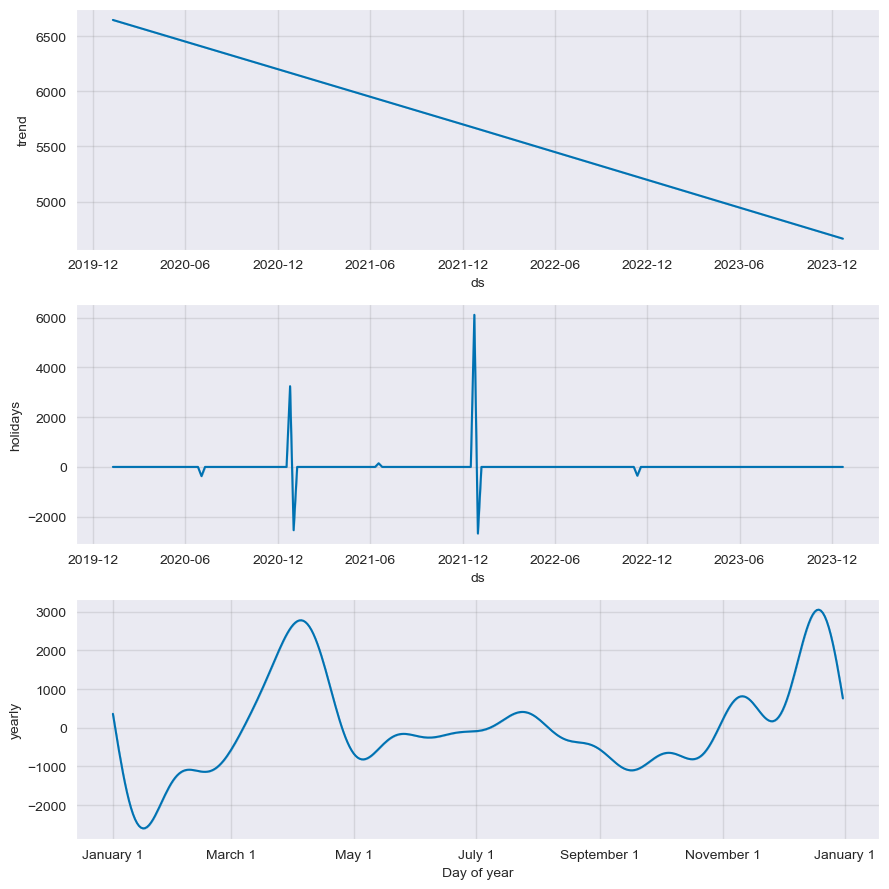

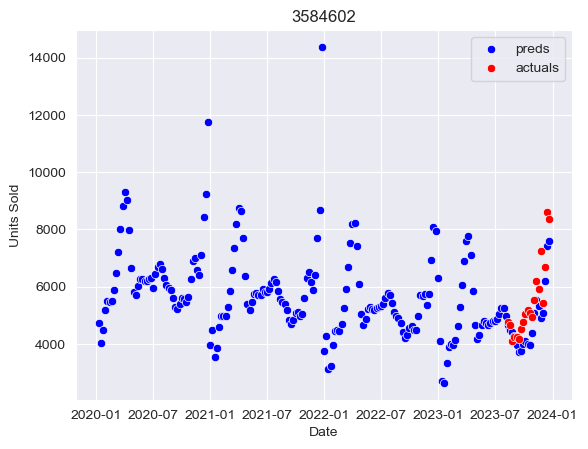

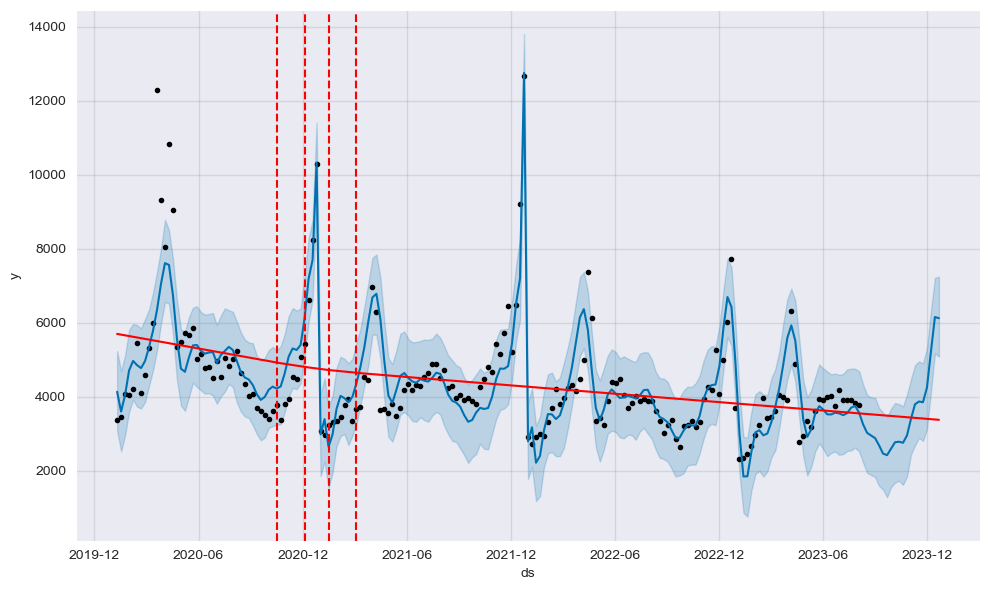

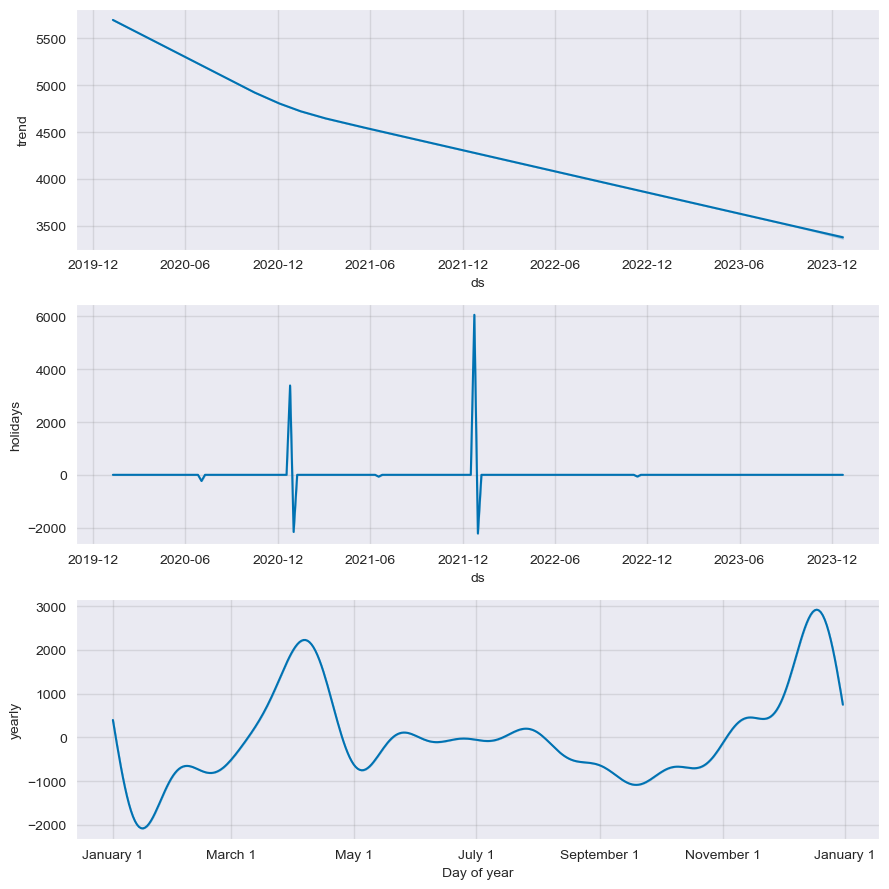

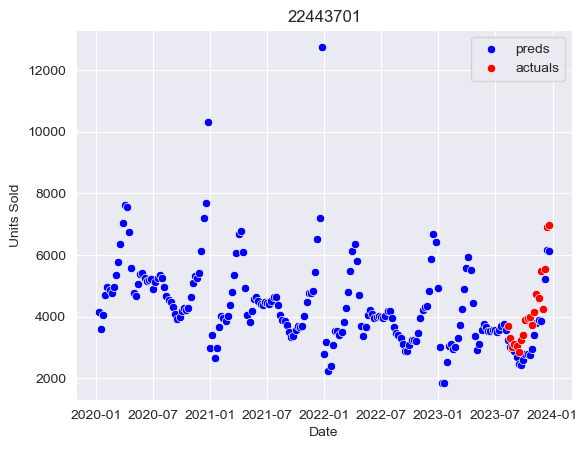

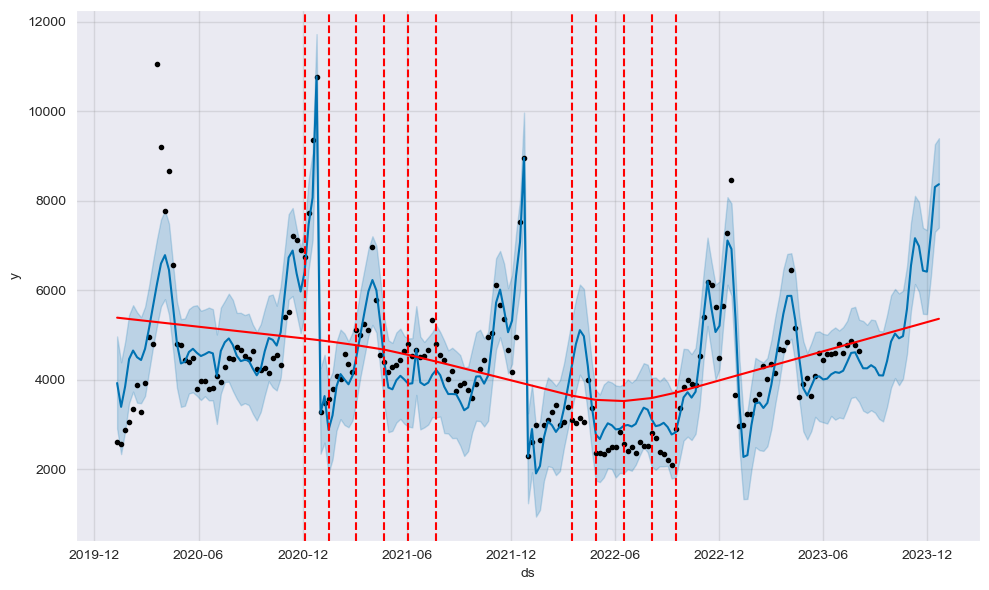

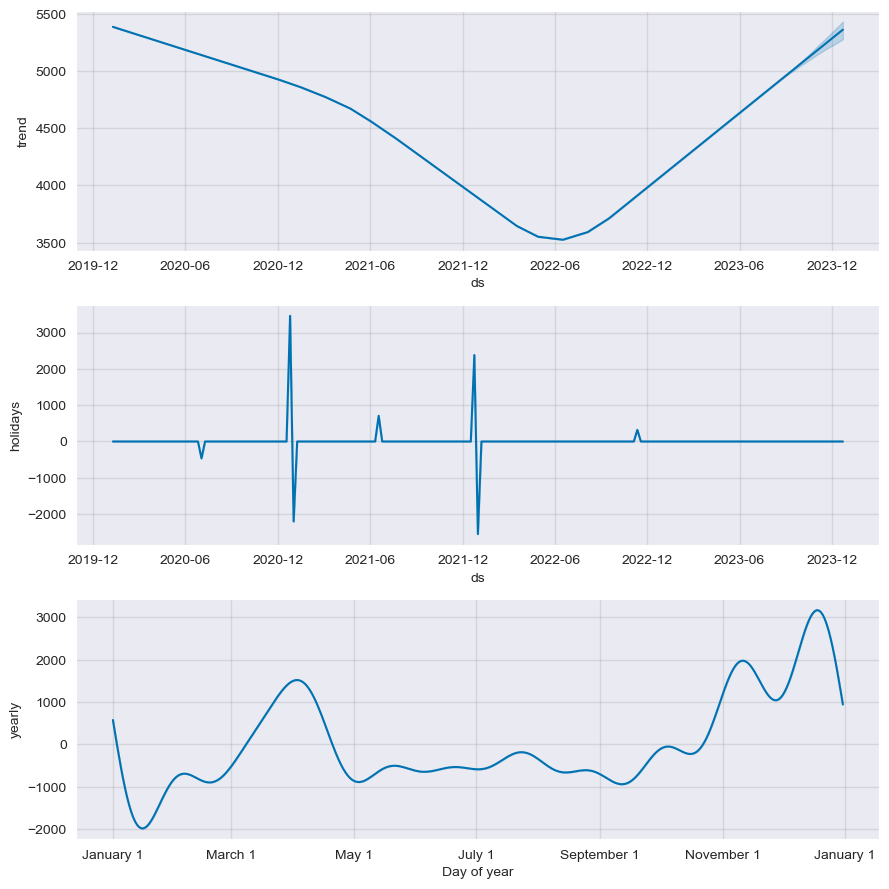

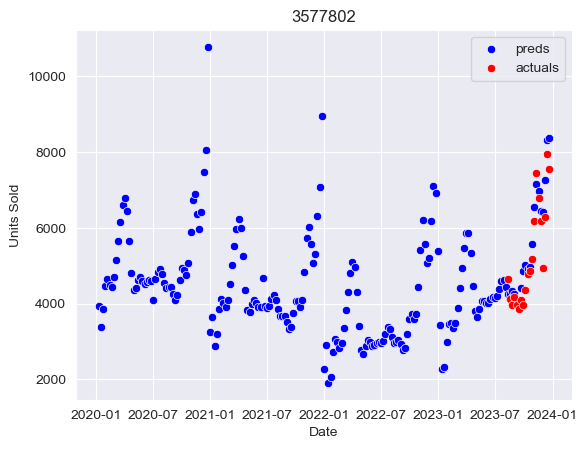

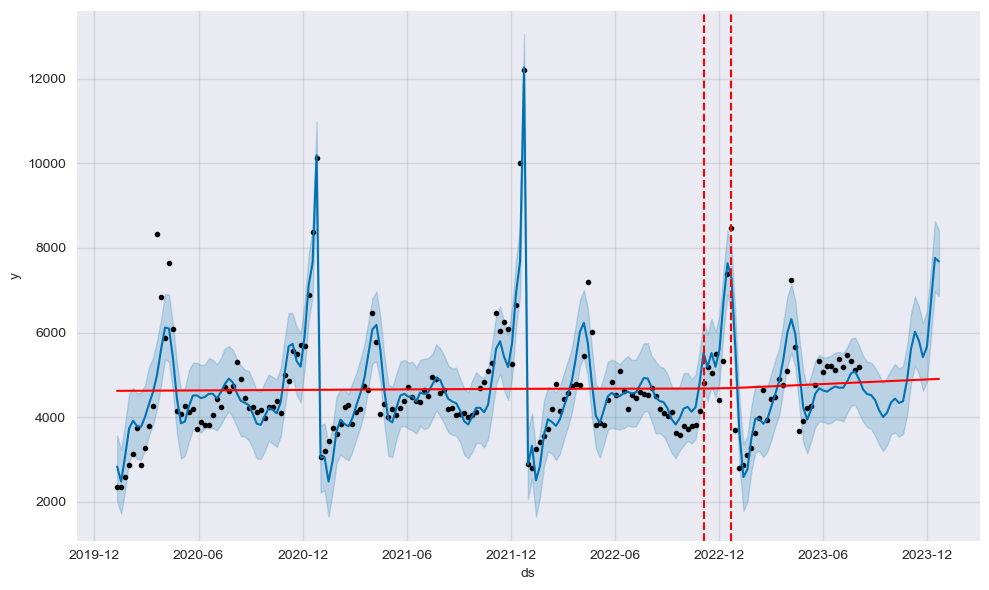

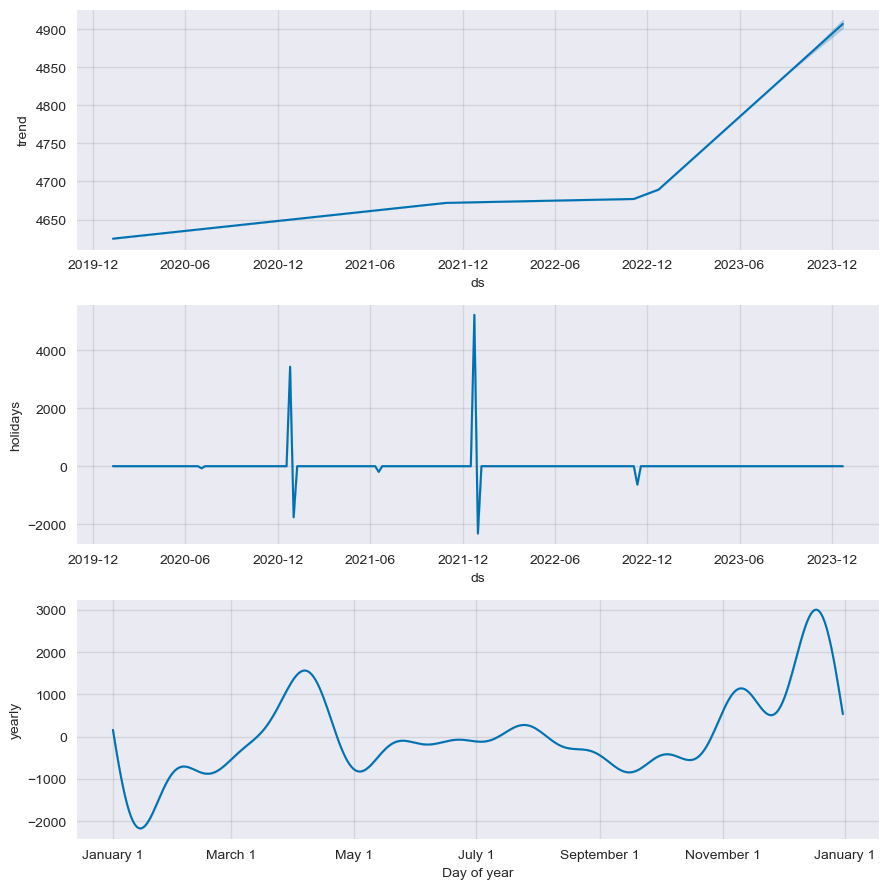

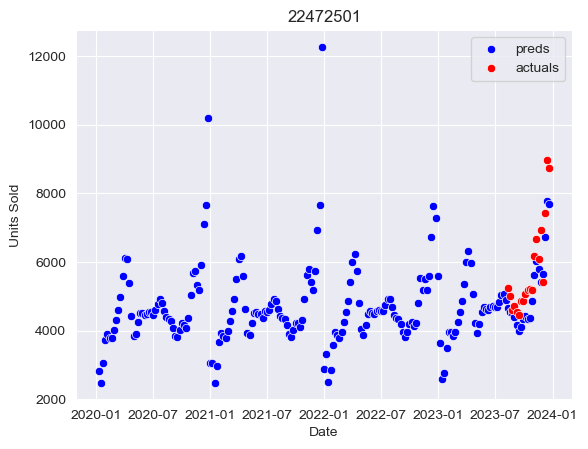

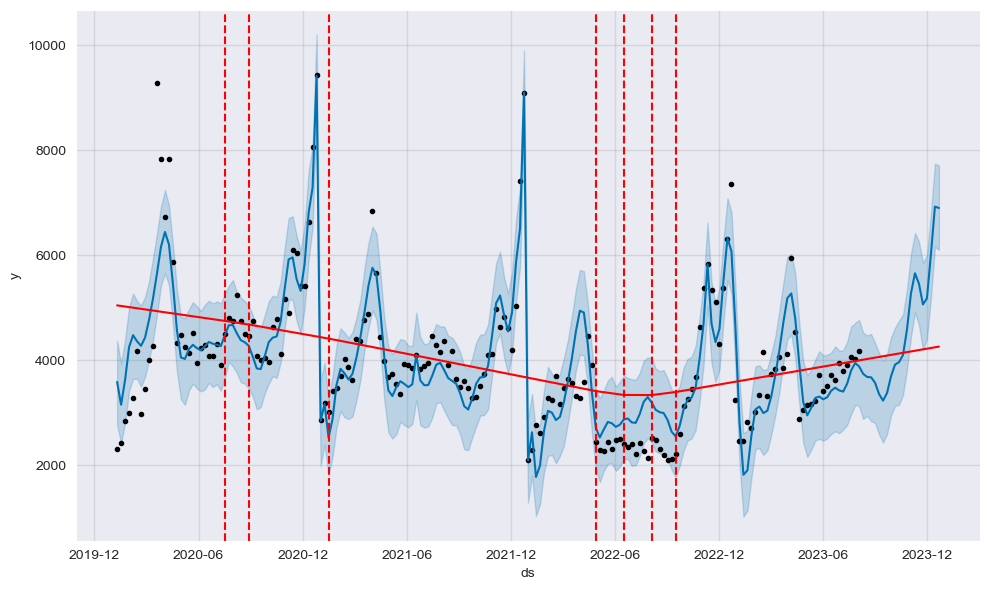

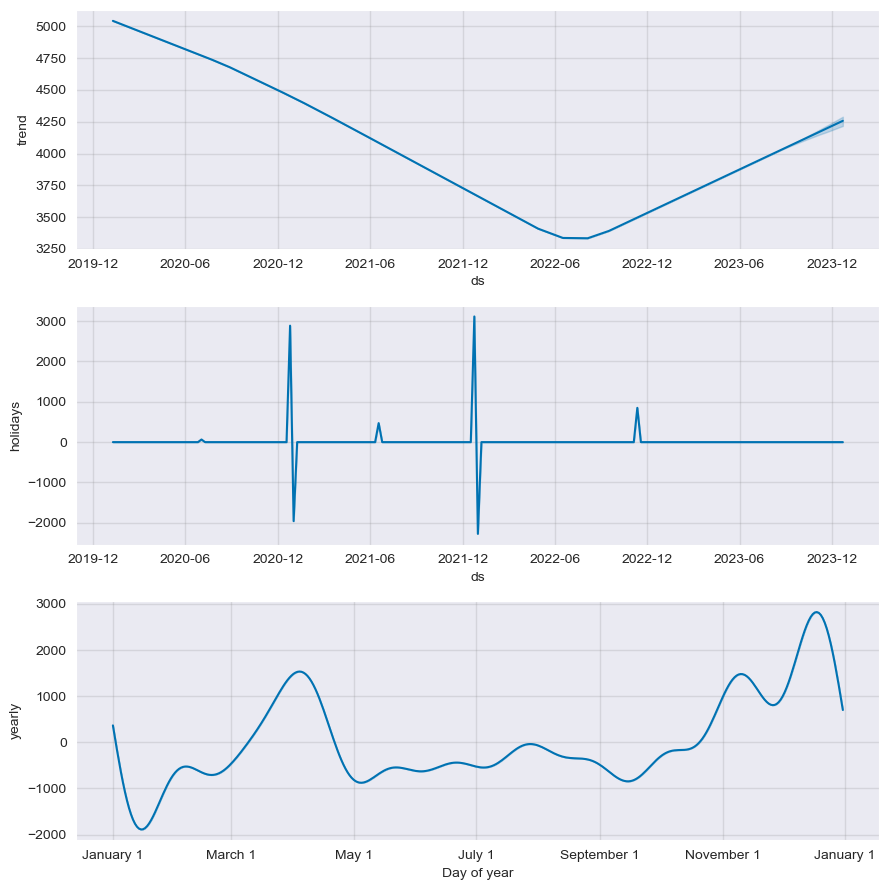

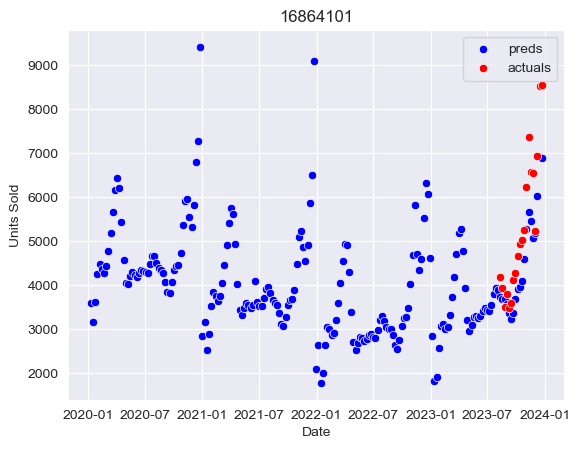

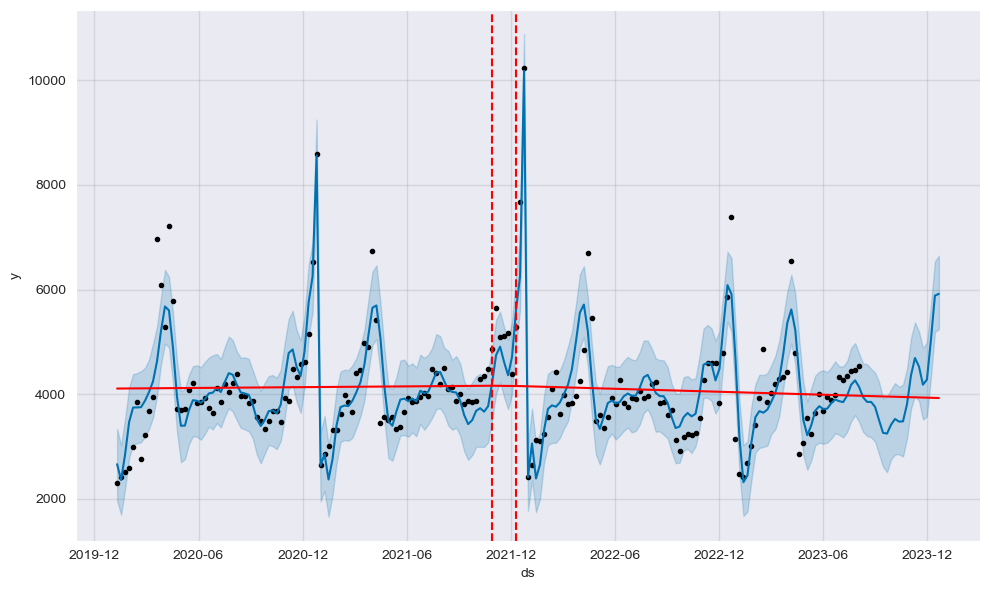

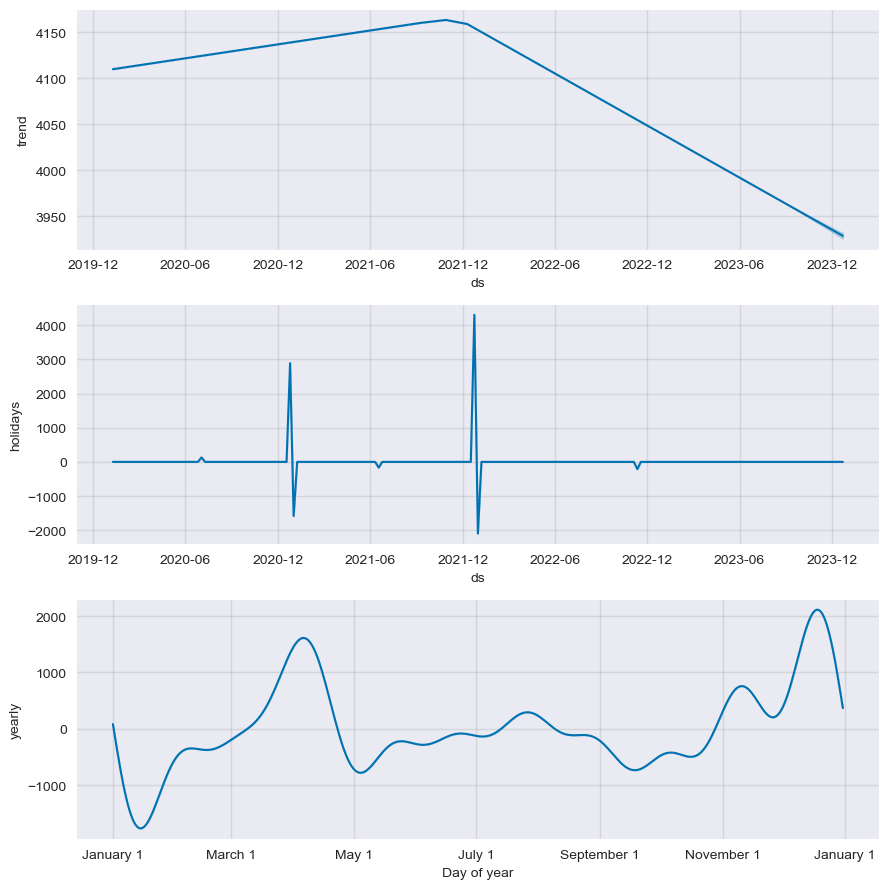

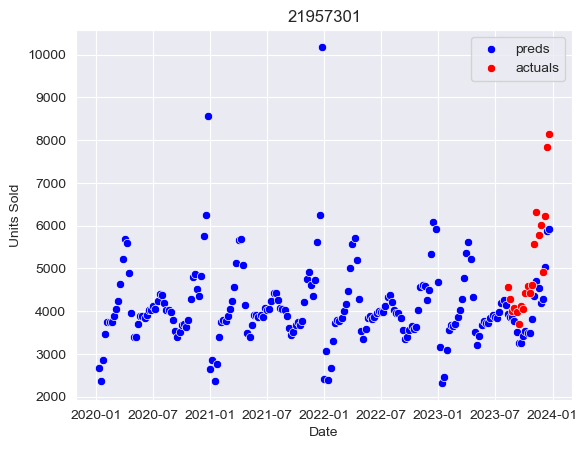

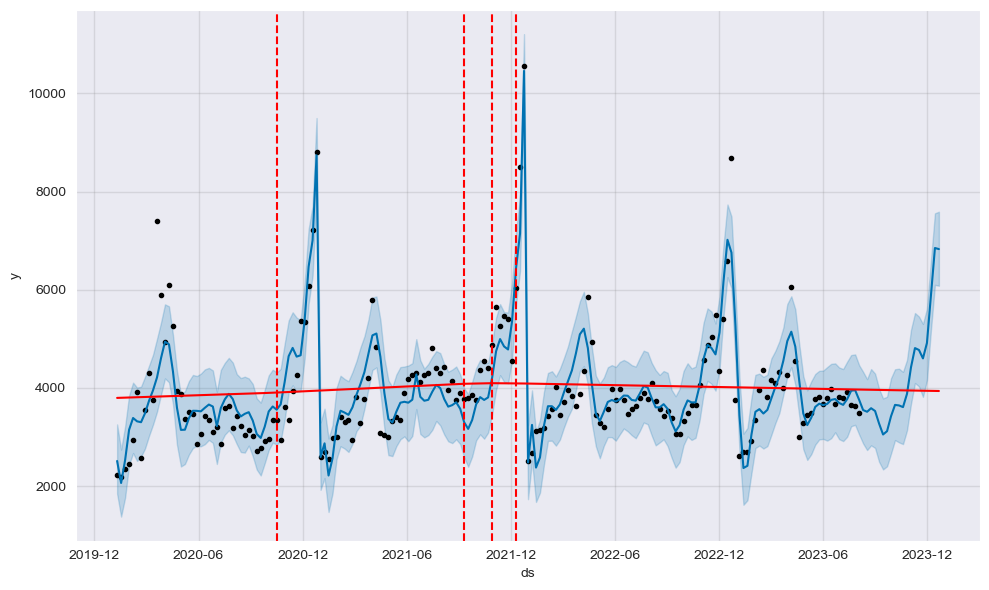

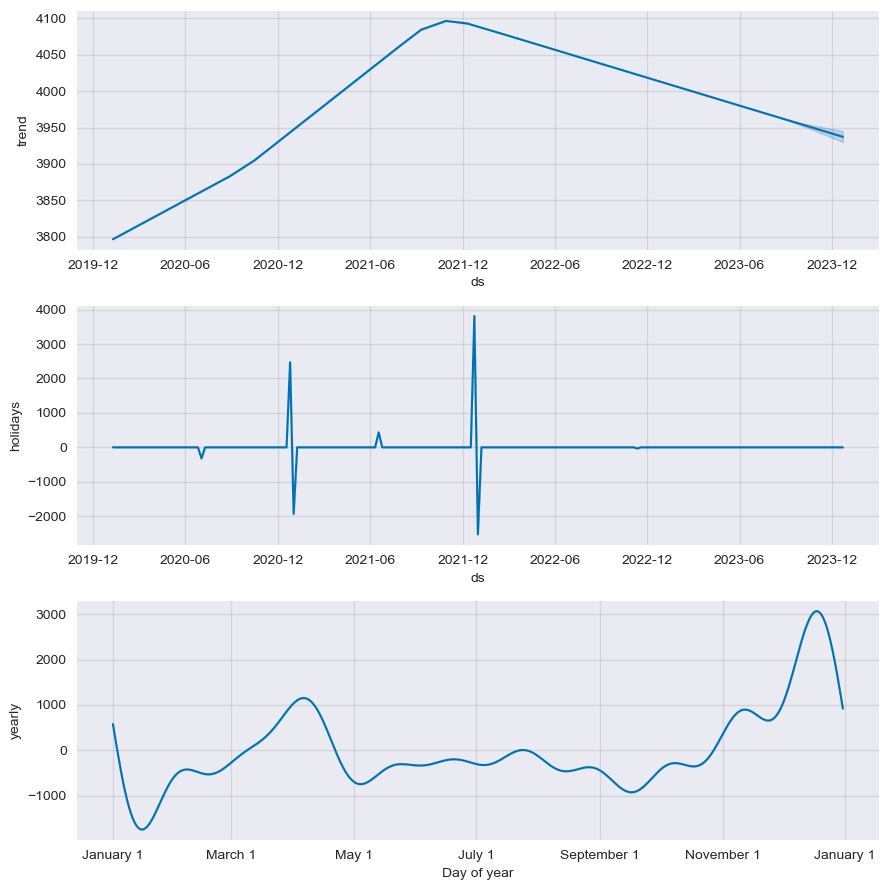

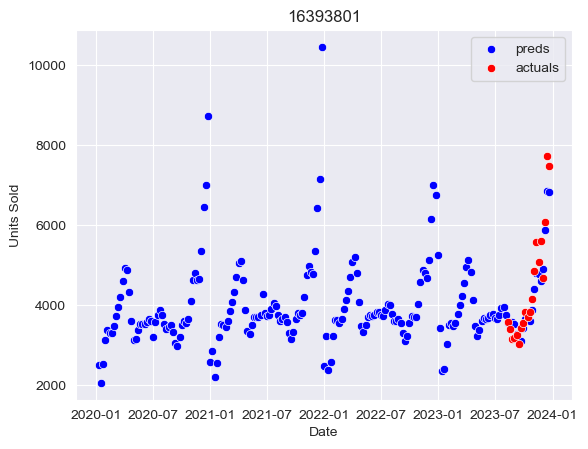

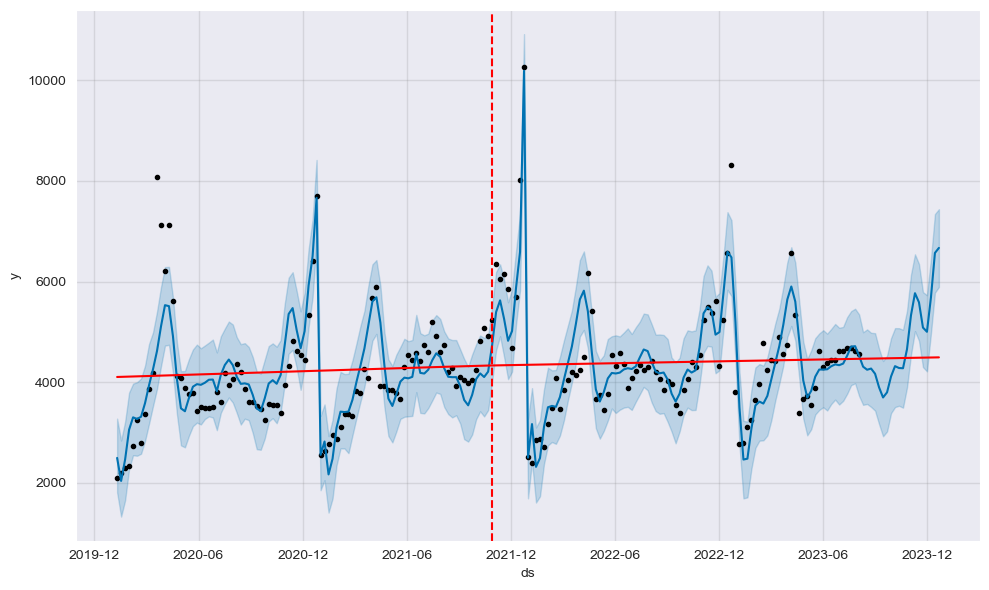

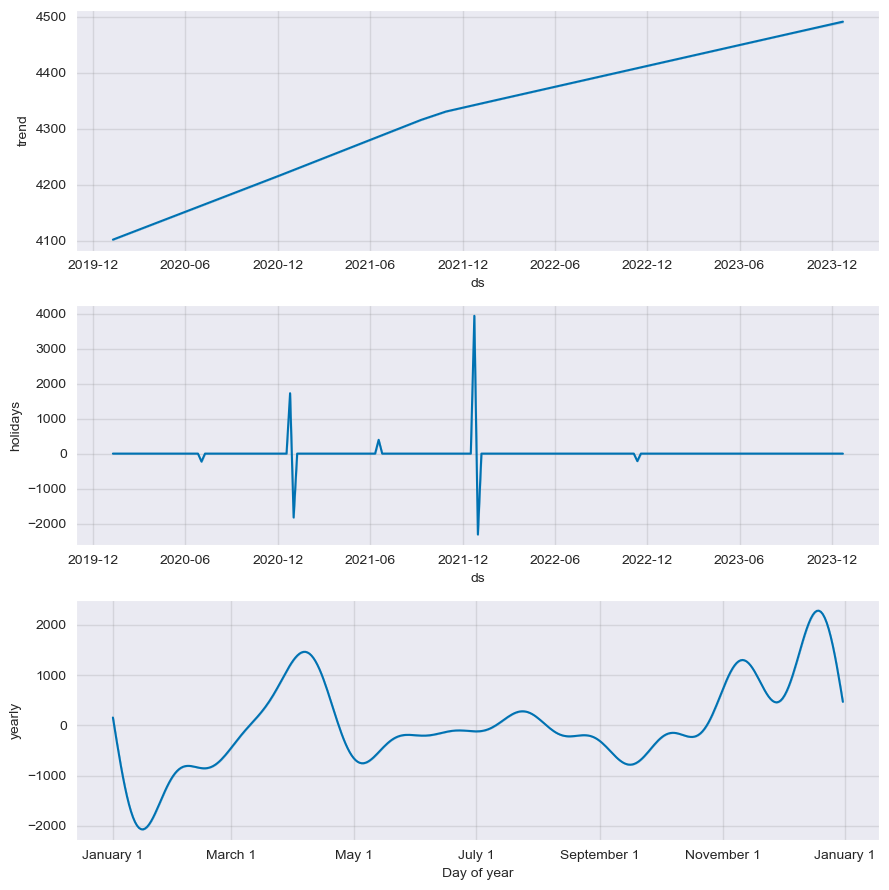

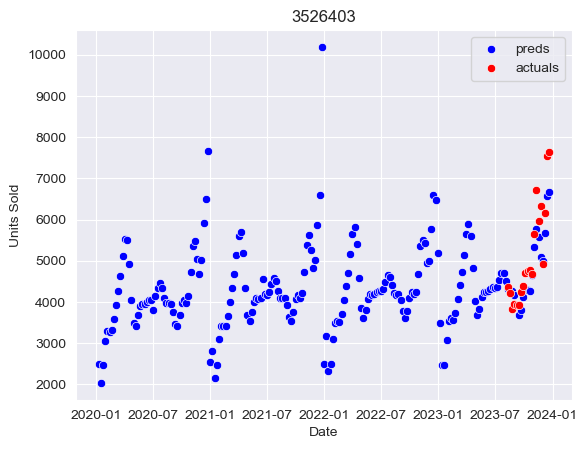

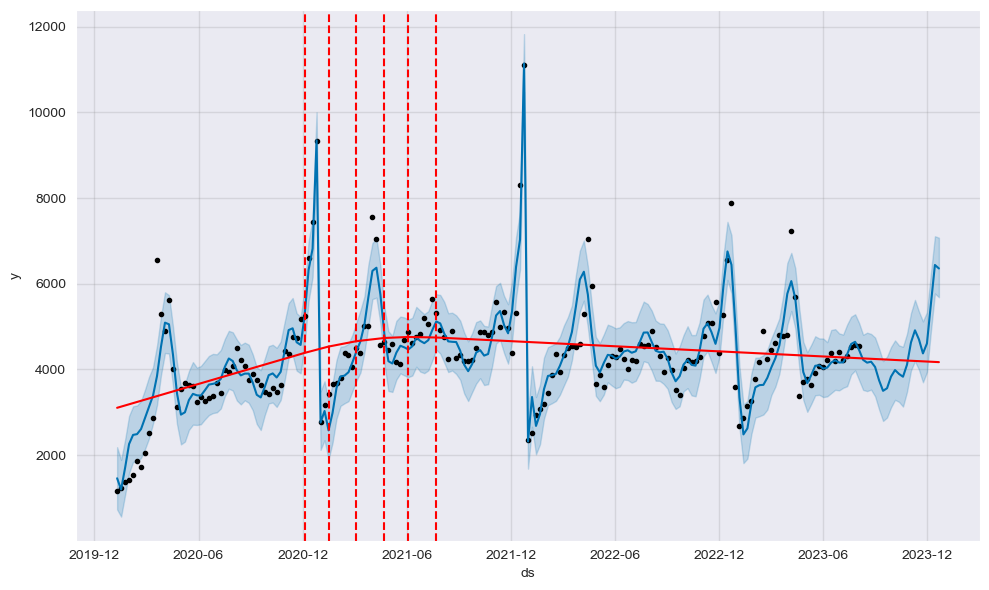

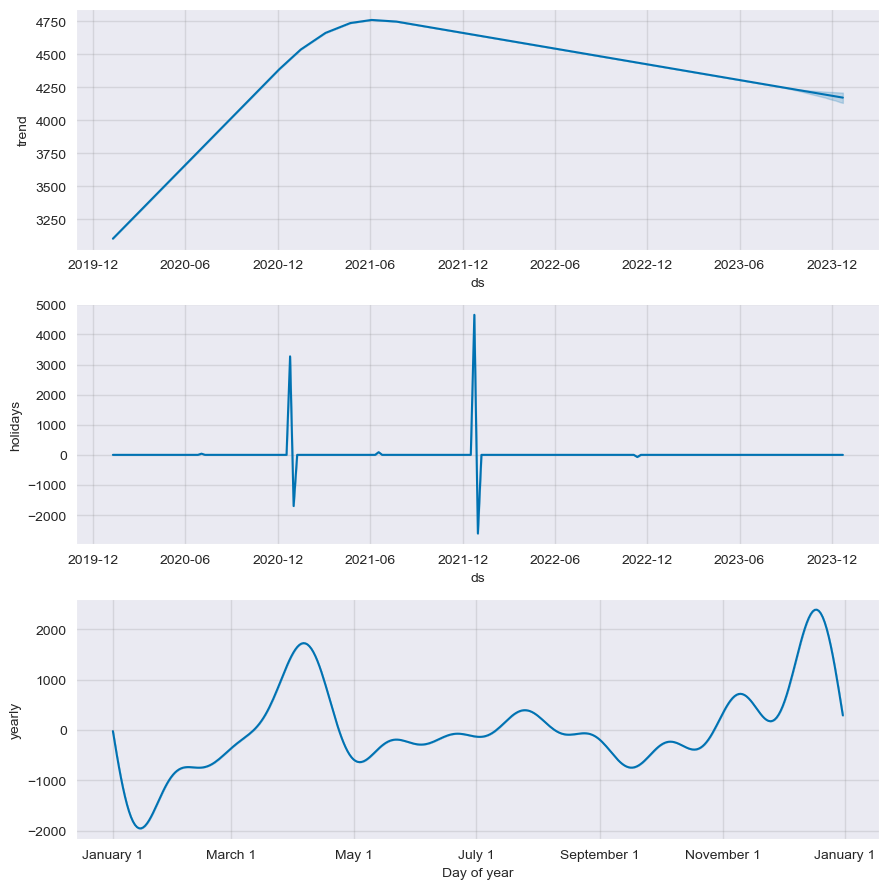

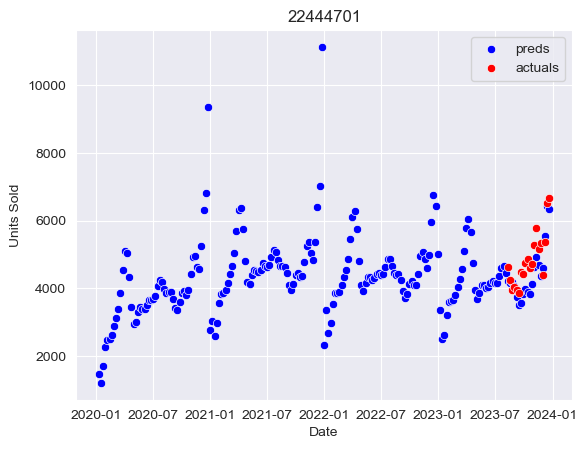

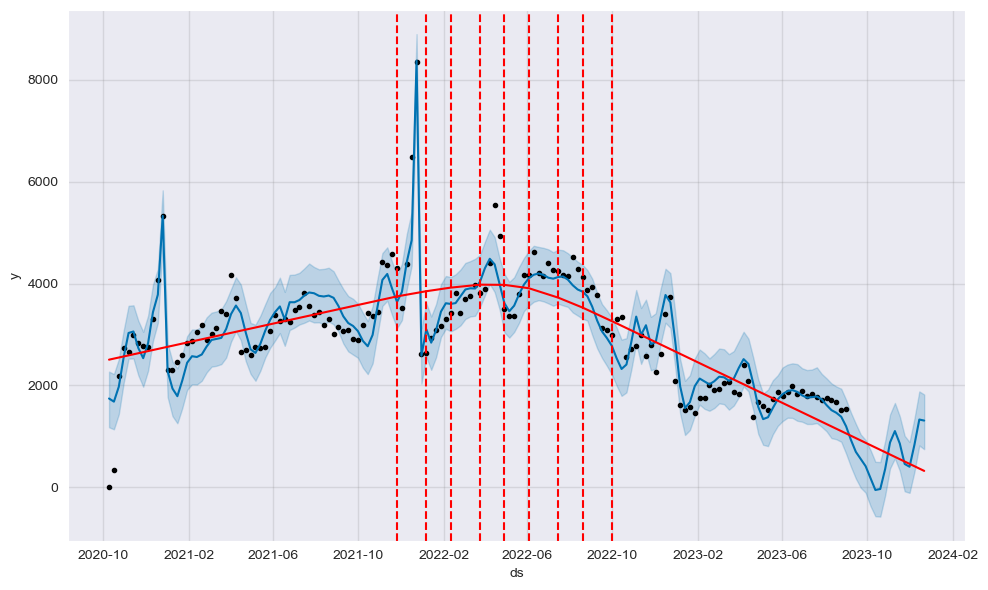

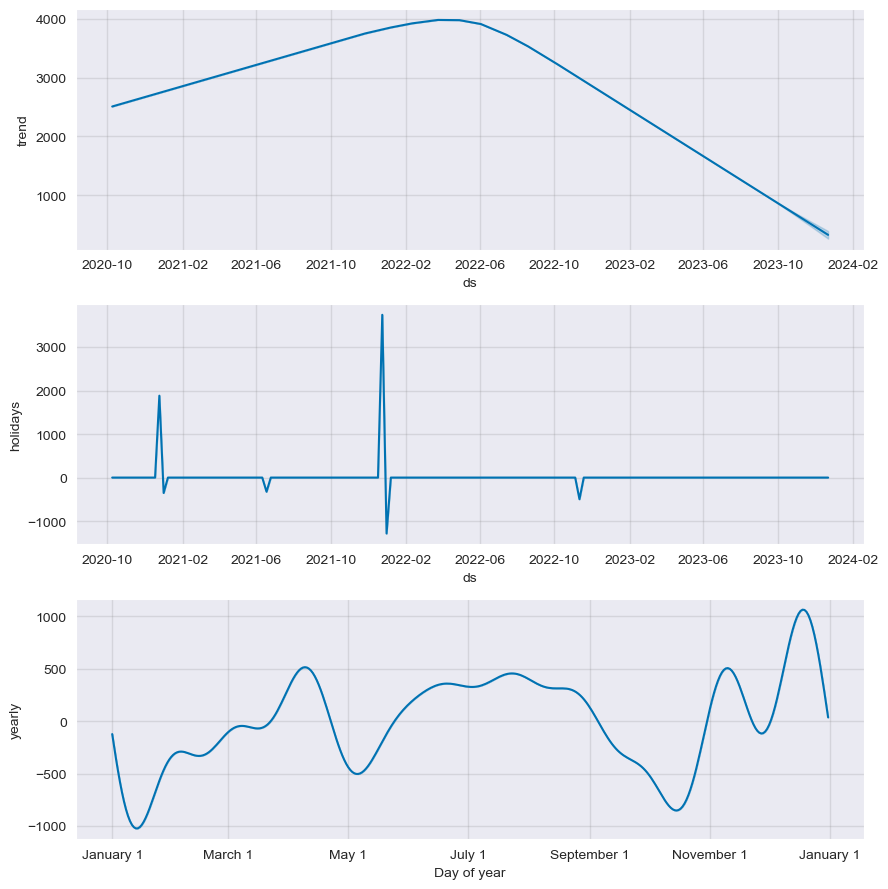

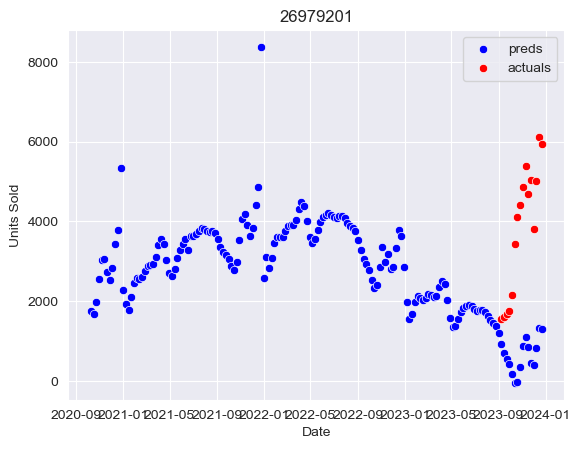

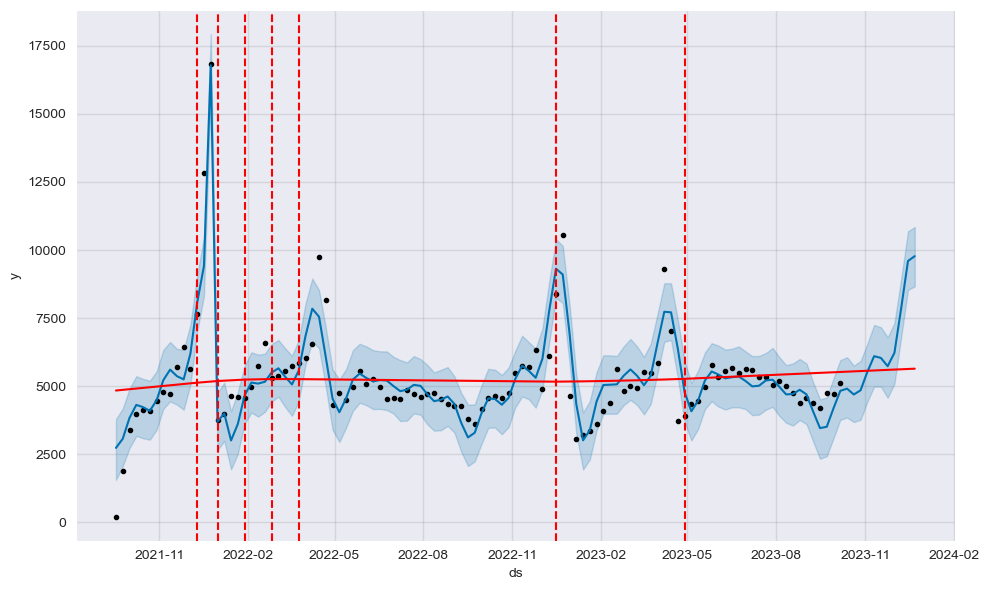

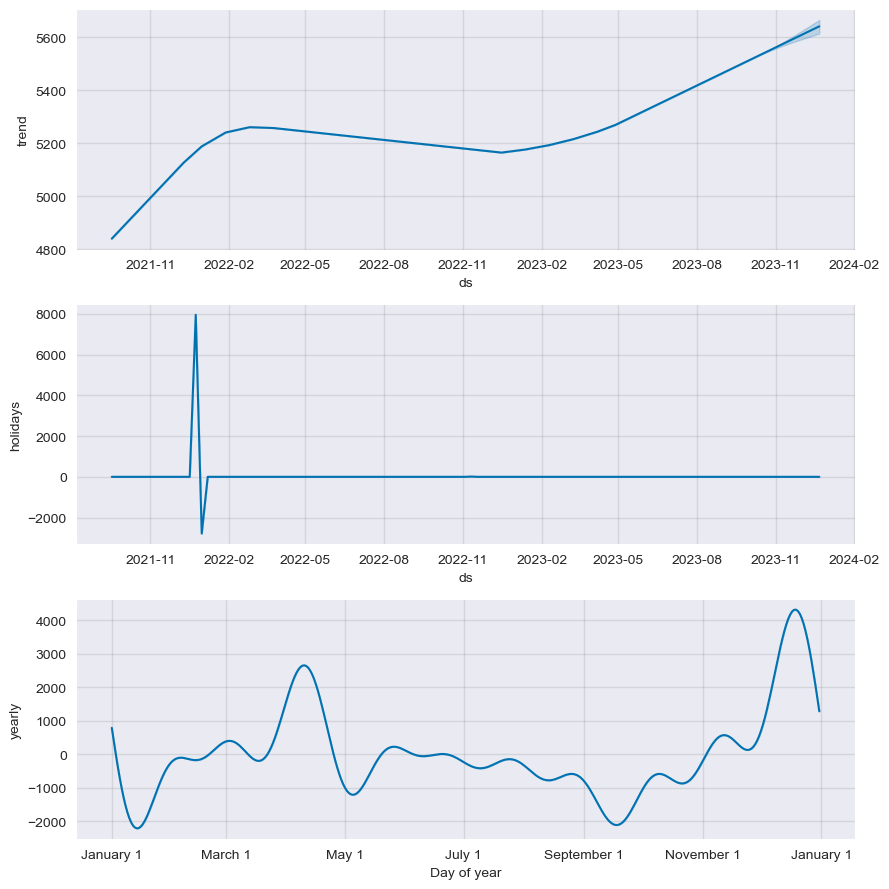

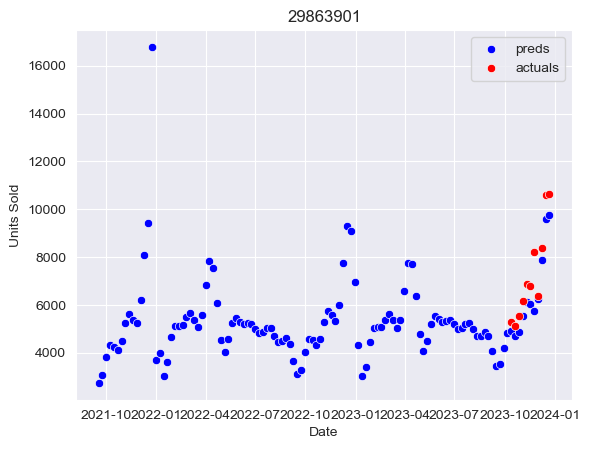

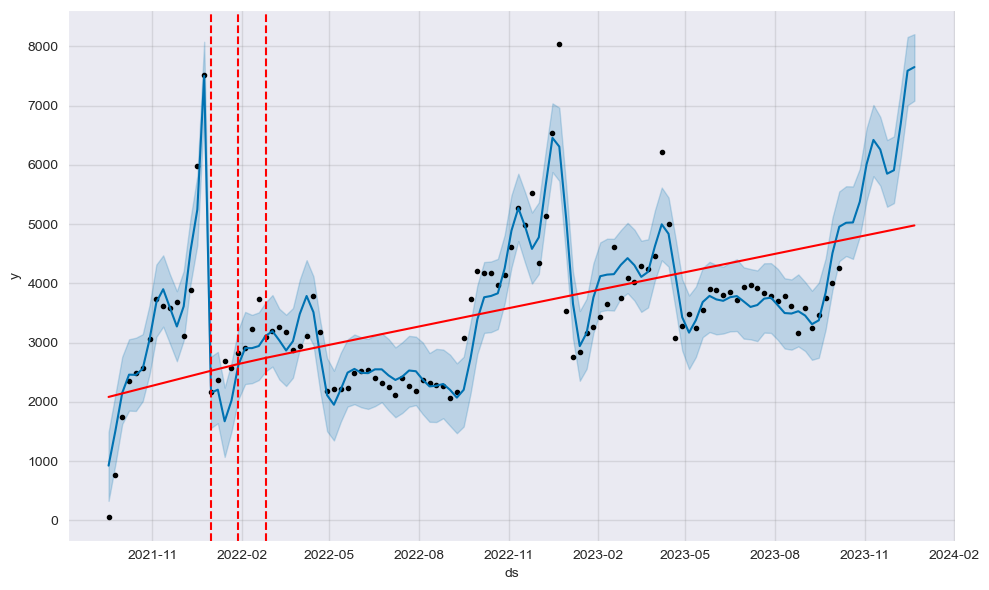

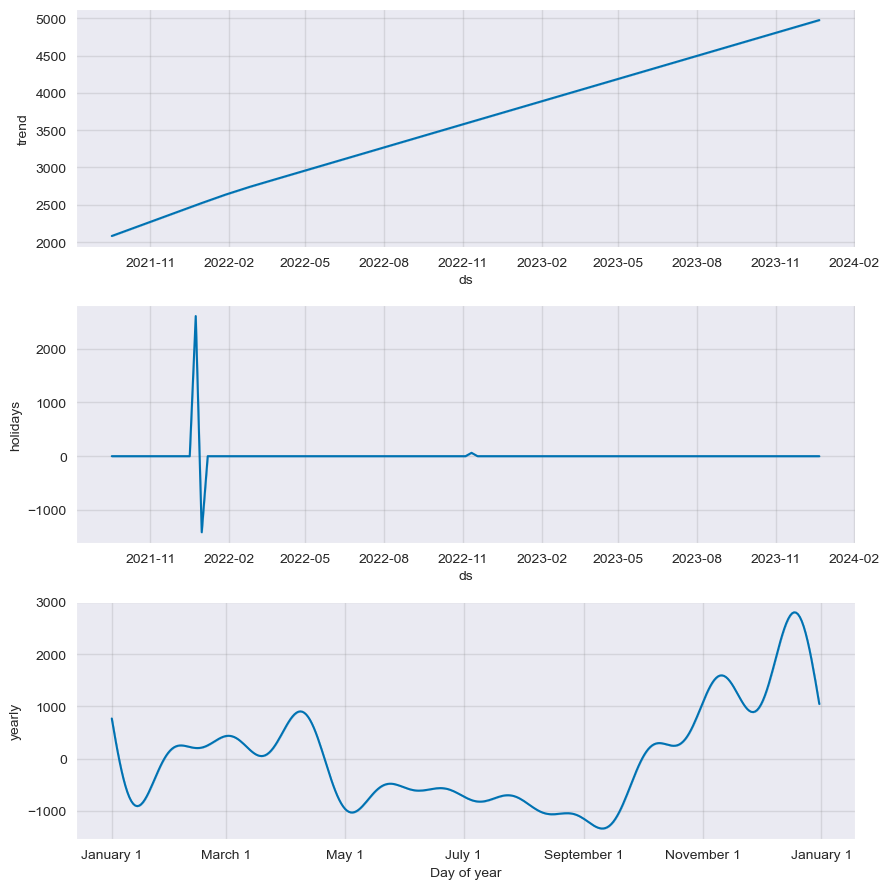

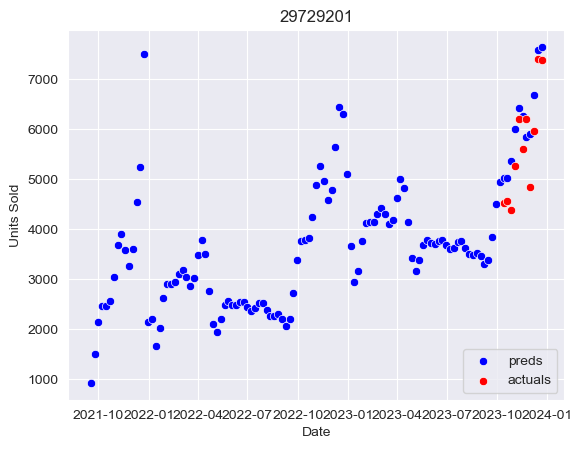

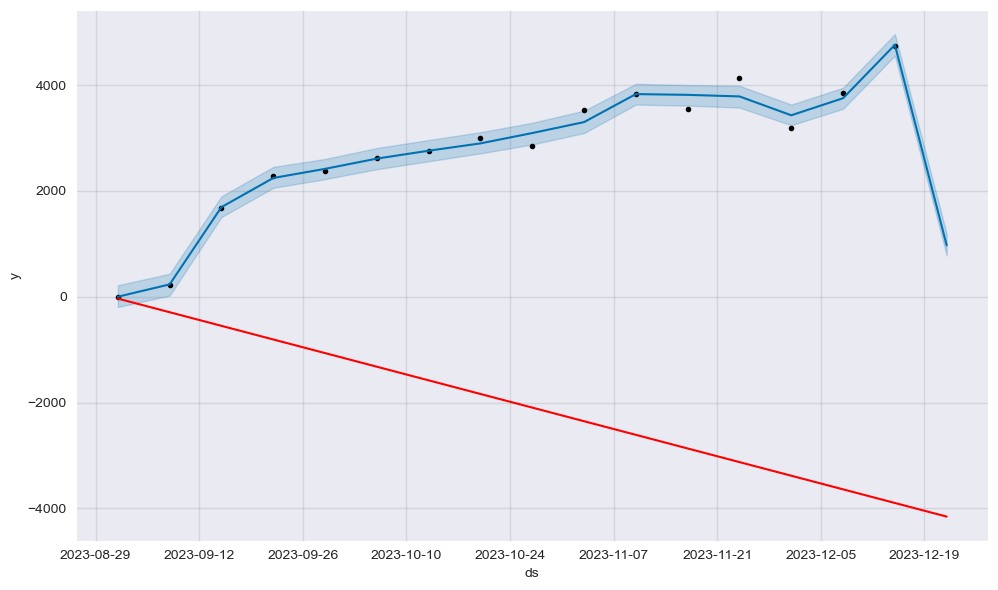

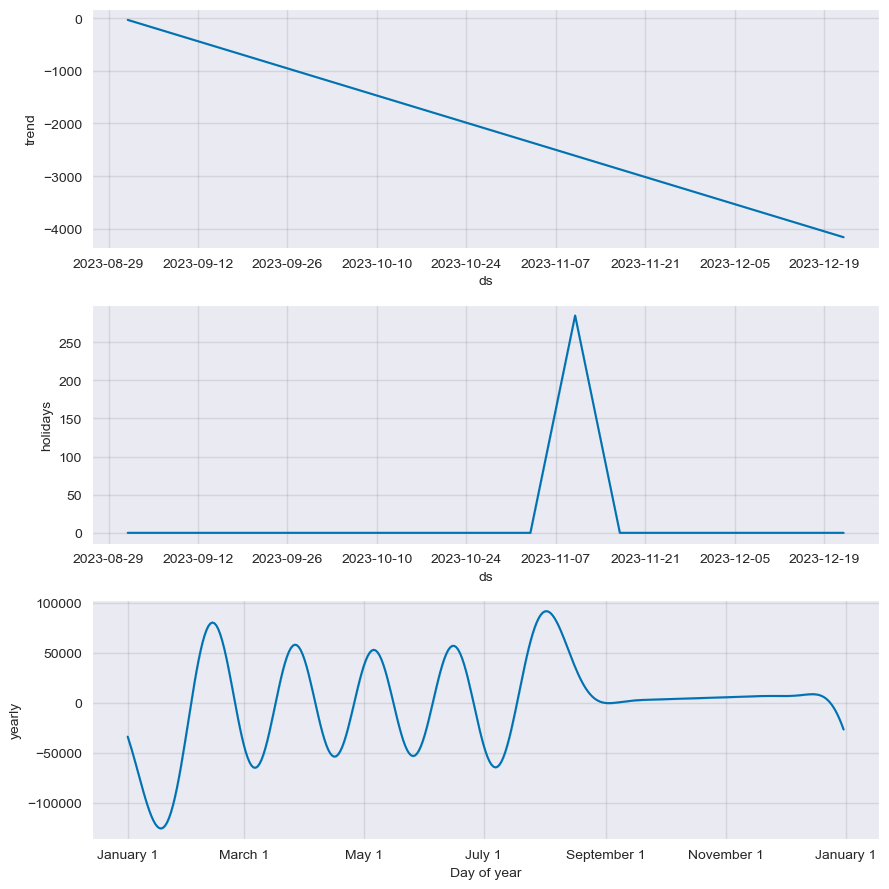

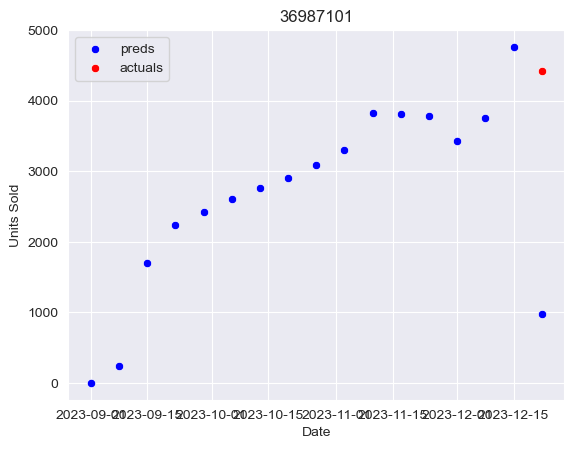

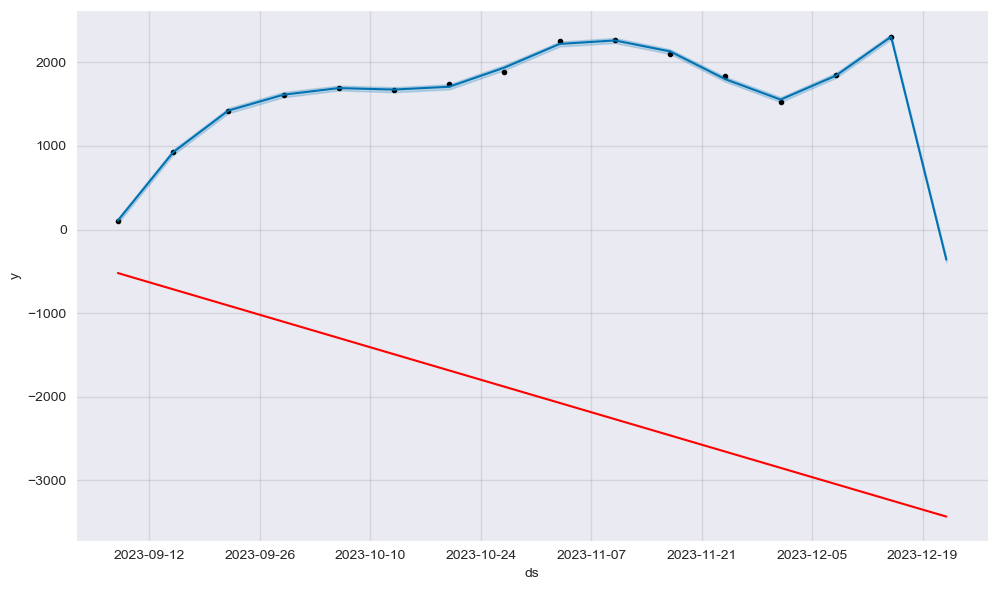

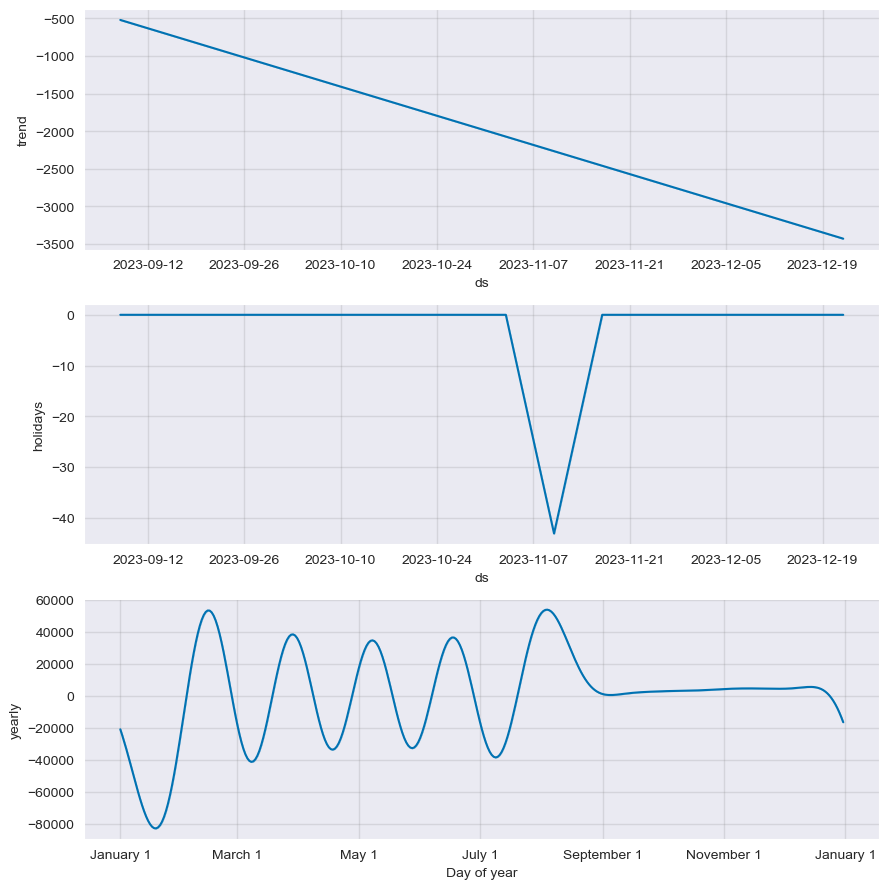

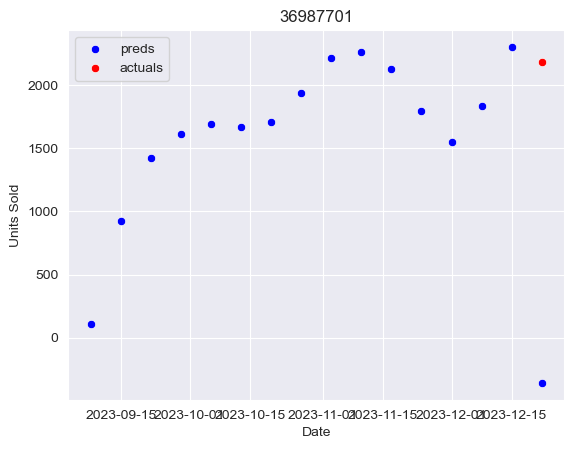

In [14]:
df = pd.read_csv("Unit Sales.csv")

sns.set_style("darkgrid")

for index, row in df.iterrows():
    
    #convert csv file to dataframe
    new_df = row.iloc[2:].to_frame()
    
    SKU = row[0]
    
    new_df.reset_index(inplace=True)
    
    #rename columns based on prophet naming conventions
    new_df.columns = ["ds", "y"]

    #convert date column values from string to datetime 
    new_date_column = [str(x)[-9:-1] for x in new_df["ds"]]
    
    date_time = [dt.datetime.strptime(x, '%m/%d/%y') for x in new_date_column]
    
    
    #rename the date column based on porphet naming conventions
    new_df["ds"] = date_time 
    
    
    #convert unit column data type
    new_df["y"] = new_df['y'].str.replace(',', '').astype(float)
    new_df["y"] = pd.to_numeric(new_df["y"])
    
    new_df = new_df.dropna(axis=0)
    
    #split data into training and testing date
    y_train, y_test = temporal_train_test_split(new_df, test_size=int(len(new_df)*.10))

    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, changepoint_range=.9)
    model.add_country_holidays(country_name="US")
    model.fit(y_train)
    
    future = model.make_future_dataframe(periods=len(y_test), freq='W-FRI')
    
    preds = model.predict(future)
    
    fig = model.plot(preds)
    a = add_changepoints_to_plot(fig.gca(), model, preds)
    model.plot_components(preds)
    
    new_df = new_df.merge(preds.loc[:, ["ds", "yhat", "yhat_lower", "yhat_upper"]], on="ds", how="left")
    
    
    fig, ax = plt.subplots(1, 1)
    
    sns.scatterplot(ax=ax, data=preds, x=preds["ds"], y=preds["yhat"], color="blue", label="preds").set(title=f"{SKU}", xlabel="Date", ylabel="Units Sold")
    sns.scatterplot(ax=ax, data=y_test, x=y_test["ds"], y=y_test["y"], color="red", label="actuals")
    
    
    #sns.lineplot(data=new_df, y=[["yhat", "y"]])
    #ax.fill_between(new_df.index, new_df["yhat_lower"], new_df["yhat_upper"])

    
    #print(f"{SKU} mean absolute percentage error ", mean_absolute_percentage_error(y_test["y"], preds.iloc[-len(y_test):, -1]))
    
    #unit_error = np.sum(preds.iloc[-len(y_test):, -1] - y_test["y"])
    #print(unit_error)
    #print("total unit error: ")
    